<h1>Deep Learning
Assignment 1 - Fashion MNIST Dataset
<h3>Ilias Giannakos - p3352007<br>
Elena Adamidi - p3352002<br>

<h5> Import Necessary Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Set Seed for reproducibility

In [2]:
from numpy.random import seed
from tensorflow.random import set_seed
seed(42)
set_seed(42)

<h5> Load Fashion MNIST dataset and check it has been loaded correctly

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#check that fashion mnist has been loaded correctly
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

<h5> Check the distribution of each label

In [4]:
print(np.bincount(y_train))
print(np.bincount(y_test))
#train & test dataset is balanced (same number of occurencies between different clothes)

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


<h5> Map labels to their original description

In [5]:
label_description = {0: "T-shirt",1: "Trouser",
2: "Pullover", 3: "Dress", 
4: "Coat", 5:"Sandal",6:"Shirt",
7:"Sneaker",8:"Bag",9:"Ankle Boot"}

print("Total fashion mnist categories are",len(label_description))

Total fashion mnist categories are 10


<h5> Preprocessing

In [6]:
#make y values categorical
y_train = tf.keras.utils.to_categorical(y_train, len(label_description))
y_test = tf.keras.utils.to_categorical(y_test, len(label_description))

#normalize pixels
x_train = (x_train.astype("float32") / 255)
x_test = (x_test.astype("float32") / 255)

#flatten the train and test data
x_train = x_train.reshape(len(x_train),784)
x_test = x_test.reshape(len(x_test),784)

#create a development set from training set for tuning
x_train, x_dev, y_train, y_dev = train_test_split(x_train,y_train, test_size=0.15, random_state=42)

Map the one-hot-encoded y values back to human-readable descriptions

In [7]:
idx = 4
print("Y train vector of index {} is:".format(idx),y_train[idx])
print("Y train of index {} original value is:".format(idx),y_train[idx].argmax())

Y train vector of index 4 is: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Y train of index 4 original value is: 6


Visualize the data

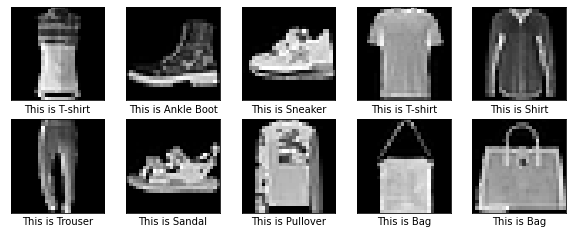

In [8]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    pixels = x_train[i].reshape((28,28))
    label = y_train[i].argmax() #with argmax we can get back the original value
    
    #plt.title('Label is {}'.format(label_description.get(label)))
    plt.imshow(pixels, cmap="gray")
    plt.xlabel("This is {}".format(label_description.get(label)))

plt.show()


<h4>Multi Layer Perceptron (MLP) Modelling

In [9]:
def create_model_mlp(num_hidden_layers: int, num_of_neurons: int, activation_hidden:str = "relu", optimizer = None, epochs:int = 100, dropout:int = None):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=784, name="Input layer"))
    for layer in range(num_hidden_layers-1):
        model.add(tf.keras.layers.Dense(num_of_neurons, activation=activation_hidden))
        if dropout:
            model.add(tf.keras.layers.Dropout(dropout))
    model.add(tf.keras.layers.Dense(int(num_of_neurons/2), activation=activation_hidden))
    model.add(tf.keras.layers.Dense(len(label_description), activation="softmax"))
    opt = optimizer
    model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model
    



Default Values:

In [10]:
epochs = 70
batch_size = 64
callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
    min_delta=0,
    patience=6,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True)

In [11]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & SGD optimizer
model = create_model_mlp(num_hidden_layers =2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.SGD())

In [12]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.9528 - accuracy: 0.7004 - val_loss: 0.6539 - val_accuracy: 0.7851
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.5720 - accuracy: 0.8062 - val_loss: 0.5386 - val_accuracy: 0.8159
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.5054 - accuracy: 0.8244 - val_loss: 0.4966 - val_accuracy: 0.8263
Epoch 4/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4707 - accuracy: 0.8369 - val_loss: 0.4694 - val_accuracy: 0.8368
Epoch 5/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4501 - accuracy: 0.8429 - val_loss: 0.4500 - val_accuracy: 0.8399
Epoch 6/70
797/797 [==============================] - 2s 2ms/step - loss: 0.4340 - accuracy: 0.8473 - val_loss: 0.4470 - val_accuracy: 0.8410
Epoch 7/70
797/797 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8513 - val_loss: 0.4266 - val_accuracy: 0.8490
Epoch 

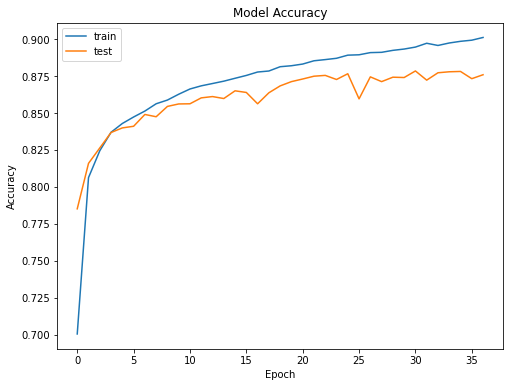

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
#results of first model on test dataset
_, val_accuracy = model.evaluate(x_test,y_test, verbose=0)
print(val_accuracy)

0.8744000196456909


In [15]:
#baseline model, 2 hidden layers, 128 & 64 neurons each layers & Adam optimizer
model2 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history2 = model2.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

print("Test accuracy is ",model2.evaluate(x_test,y_test)[1])


Epoch 1/70
797/797 [==============================] - 2s 2ms/step - loss: 0.5194 - accuracy: 0.8186 - val_loss: 0.4087 - val_accuracy: 0.8548
Epoch 2/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3762 - accuracy: 0.8618 - val_loss: 0.4054 - val_accuracy: 0.8529
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3415 - accuracy: 0.8745 - val_loss: 0.3619 - val_accuracy: 0.8723
Epoch 4/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3166 - accuracy: 0.8837 - val_loss: 0.3384 - val_accuracy: 0.8790
Epoch 5/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2997 - accuracy: 0.8892 - val_loss: 0.3255 - val_accuracy: 0.8816
Epoch 6/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2834 - accuracy: 0.8947 - val_loss: 0.3312 - val_accuracy: 0.8819
Epoch 7/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2713 - accuracy: 0.8985 - val_loss: 0.3473 - val_accuracy: 0.8777
Epoch 

In [16]:
#results of second model on test dataset
_, val_accuracy = model2.evaluate(x_test,y_test, verbose=0)
print(val_accuracy)

0.888700008392334


As we observe, Adam optimizer achieves better performance (0.88,4 val accuracy) while taking much less epochs to converge.

In [17]:
#We now try with 5 hidden layers, 128x4 each layer + 64 neurons on last & Adam optimizer
model3 = create_model_mlp(num_hidden_layers = 5, num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam())
history = model3.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.5420 - accuracy: 0.8061 - val_loss: 0.4264 - val_accuracy: 0.8490
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3828 - accuracy: 0.8602 - val_loss: 0.4164 - val_accuracy: 0.8457
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3488 - accuracy: 0.8711 - val_loss: 0.3801 - val_accuracy: 0.8598
Epoch 4/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3236 - accuracy: 0.8812 - val_loss: 0.3649 - val_accuracy: 0.8689
Epoch 5/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3068 - accuracy: 0.8863 - val_loss: 0.3404 - val_accuracy: 0.8732
Epoch 6/70
797/797 [==============================] - 2s 3ms/step - loss: 0.2886 - accuracy: 0.8923 - val_loss: 0.3360 - val_accuracy: 0.8792
Epoch 7/70
797/797 [==============================] - 2s 3ms/step - loss: 0.2781 - accuracy: 0.8957 - val_loss: 0.3469 - val_accuracy: 0.8769
Epoch 

In [18]:
_, val_accuracy = model3.evaluate(x_test,y_test)
print(val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3525 - accuracy: 0.8889
0.8888999819755554


In [19]:
print("the model with 3 extra layers has less val accuracy than the previous with 2 hidden ({}), therefore we discard it".format(model2.evaluate(x_test,y_test, verbose=0)[1]))

the model with 3 extra layers has less val accuracy than the previous with 2 hidden (0.888700008392334), therefore we discard it


In [20]:
predictions = model2.predict(x_test)
print("probability distribution of each class", predictions[0]) 
print("Model predicts this is",label_description.get(np.argmax(predictions[0])), "and the true label is", label_description.get(np.argmax(y_test[0])))

probability distribution of each class [1.2793032e-09 8.6692387e-09 1.4937847e-08 9.8708650e-09 6.1015260e-09
 3.8361594e-03 3.4105510e-09 5.1871780e-03 8.1754497e-09 9.9097657e-01]
Model predicts this is Ankle Boot and the true label is Ankle Boot


In [21]:
#model with 2 hidden layers (same as model2) but now with dropout
model4 = create_model_mlp(num_hidden_layers = 2 ,num_of_neurons=128, activation_hidden="relu", optimizer=tf.keras.optimizers.Adam(), dropout=0.1)
history4 = model4.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (x_dev, y_dev)
)

print("Test accuracy is ",model4.evaluate(x_test,y_test)[1])
print("This is a tiny improvement over model2, but as dropout regularizes the model we will keep this as our baseline model")

Epoch 1/70
797/797 [==============================] - 3s 3ms/step - loss: 0.5342 - accuracy: 0.8122 - val_loss: 0.4060 - val_accuracy: 0.8537
Epoch 2/70
797/797 [==============================] - 2s 3ms/step - loss: 0.3919 - accuracy: 0.8584 - val_loss: 0.4013 - val_accuracy: 0.8540
Epoch 3/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3603 - accuracy: 0.8690 - val_loss: 0.3519 - val_accuracy: 0.8708
Epoch 4/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3366 - accuracy: 0.8759 - val_loss: 0.3342 - val_accuracy: 0.8819
Epoch 5/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3186 - accuracy: 0.8829 - val_loss: 0.3352 - val_accuracy: 0.8766
Epoch 6/70
797/797 [==============================] - 2s 2ms/step - loss: 0.3031 - accuracy: 0.8887 - val_loss: 0.3261 - val_accuracy: 0.8806
Epoch 7/70
797/797 [==============================] - 2s 2ms/step - loss: 0.2918 - accuracy: 0.8915 - val_loss: 0.3433 - val_accuracy: 0.8758
Epoch 

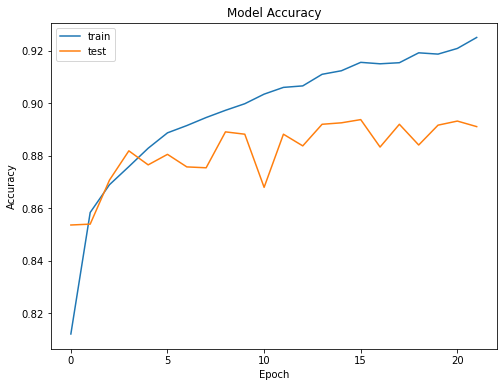

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h4>CNN's

In [23]:
# Reshape training and testing image
#we need to reshape your data is that Tensorflow expects a certain input shape for its Deep Learning Model, i.e., in this case, a Convolution Neural Network, specifically
#(<number of images>, <image x_dim>, <image y_dim>, <number of channels>)
train_X_cnn = x_train.reshape(-1, 28, 28, 1)
dev_X_cnn = x_dev.reshape(-1, 28, 28, 1)
test_x_cnn = x_test.reshape(-1,28,28,1)

In [24]:
model5 = tf.keras.models.Sequential()
model5.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.MaxPooling2D((2, 2)))
model5.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(tf.keras.layers.Flatten())
model5.add(tf.keras.layers.Dense(64, activation='relu'))
model5.add(tf.keras.layers.Dense(10, activation = "softmax"))
model5.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [25]:
history5 = model5.fit(
    train_X_cnn, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (dev_X_cnn, y_dev)
)

Epoch 1/70
797/797 [==============================] - 21s 26ms/step - loss: 0.5596 - accuracy: 0.7948 - val_loss: 0.3901 - val_accuracy: 0.8586
Epoch 2/70
797/797 [==============================] - 20s 26ms/step - loss: 0.3543 - accuracy: 0.8723 - val_loss: 0.3299 - val_accuracy: 0.8804
Epoch 3/70
797/797 [==============================] - 20s 25ms/step - loss: 0.3033 - accuracy: 0.8886 - val_loss: 0.3074 - val_accuracy: 0.8892
Epoch 4/70
797/797 [==============================] - 20s 25ms/step - loss: 0.2730 - accuracy: 0.8995 - val_loss: 0.2837 - val_accuracy: 0.8966
Epoch 5/70
797/797 [==============================] - 21s 26ms/step - loss: 0.2493 - accuracy: 0.9079 - val_loss: 0.2794 - val_accuracy: 0.8971
Epoch 6/70
797/797 [==============================] - 21s 26ms/step - loss: 0.2294 - accuracy: 0.9148 - val_loss: 0.2705 - val_accuracy: 0.9008
Epoch 7/70
797/797 [==============================] - 20s 25ms/step - loss: 0.2088 - accuracy: 0.9227 - val_loss: 0.2798 - val_accuracy:

In [26]:
_, val_accuracy = model5.evaluate(test_x_cnn,y_test, verbose=0)
print(val_accuracy)

0.9072999954223633


In [27]:
#final CNN (same as before) but with dropout & batch norm

model6 = tf.keras.models.Sequential()
model6.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(tf.keras.layers.BatchNormalization())
model6.add(tf.keras.layers.MaxPooling2D((2, 2)))
model6.add(tf.keras.layers.Dropout(0.2))
model6.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model6.add(tf.keras.layers.Flatten())
model6.add(tf.keras.layers.Dense(64, activation='relu'))
model6.add(tf.keras.layers.Dense(10, activation = "softmax"))
model6.compile(loss='categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [28]:
history6 = model6.fit(
    train_X_cnn, y_train, epochs=epochs, batch_size=batch_size, callbacks=callbacks, validation_data = (dev_X_cnn, y_dev)
)
_, val_accuracy = model6.evaluate(test_x_cnn,y_test, verbose=0)
print("Accuracy on test dataset=", val_accuracy)

predictions = model6.predict(test_x_cnn)


Epoch 1/70
797/797 [==============================] - 34s 42ms/step - loss: 0.4857 - accuracy: 0.8212 - val_loss: 0.3624 - val_accuracy: 0.8670
Epoch 2/70
797/797 [==============================] - 33s 42ms/step - loss: 0.3297 - accuracy: 0.8782 - val_loss: 0.3042 - val_accuracy: 0.8882
Epoch 3/70
797/797 [==============================] - 33s 42ms/step - loss: 0.2929 - accuracy: 0.8925 - val_loss: 0.2924 - val_accuracy: 0.8926
Epoch 4/70
797/797 [==============================] - 33s 42ms/step - loss: 0.2668 - accuracy: 0.9006 - val_loss: 0.2726 - val_accuracy: 0.9013
Epoch 5/70
797/797 [==============================] - 34s 42ms/step - loss: 0.2504 - accuracy: 0.9062 - val_loss: 0.2637 - val_accuracy: 0.9061
Epoch 6/70
797/797 [==============================] - 34s 42ms/step - loss: 0.2374 - accuracy: 0.9110 - val_loss: 0.2632 - val_accuracy: 0.9031
Epoch 7/70
797/797 [==============================] - 33s 42ms/step - loss: 0.2227 - accuracy: 0.9162 - val_loss: 0.2780 - val_accuracy:

The model6 has even better accuracy on test dataset then model5, after using batch norm and dropout simultaneously.

In [29]:
#visualization of predictions over actual values:

def plot_image(idx, predictions_array, true_label, img):
  #true_label, img = true_label[idx], img[idx]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap="gray")

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label.argmax():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} - {:2.0f}% ({})".format(label_description.get(predicted_label),
                                100*np.max(predictions_array),
                                label_description.get(true_label.argmax())),
                                color=color)

def plot_value_array(idx, predictions_array, true_label):
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label.argmax()].set_color('blue')

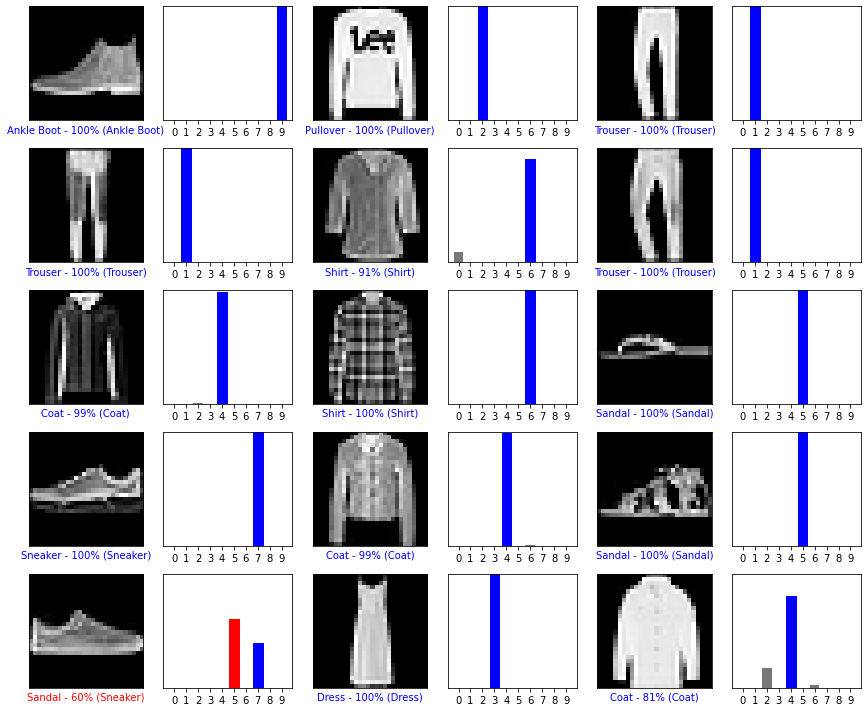

In [30]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test[i], x_test[i].reshape(28,28))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i,  predictions[i],  y_test[i])
plt.tight_layout()
plt.show()